# Live Session 8
## Advanced Visualization
#### By Ika Nurfitriani (PYTN-KS10-008)
Di pertemuan ini akan membahas visualisasi tingkat lanjut menggunakan Python. Terdapat beberapa hal yang akan dipelajari yaitu world cloud, regression plot, membuat peta dan membuat marker pada peta.

In [2]:
# Install wordcloud
! pip install wordcloud

In [3]:
# Import library
from wordcloud import WordCloud, STOPWORDS

In [4]:
# Open file
alice_novel = open('alice_novel.txt', 'r').read()

In [5]:
# Delete redundant stopword
stopwords = set(STOPWORDS)

In [6]:
# Inisiasi wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# Generate wordcloud
alice_wc.generate(alice_novel)

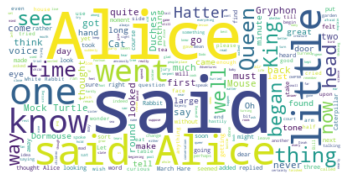

In [7]:
# Tampilkan wordcloud
import matplotlib.pyplot as plt
plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

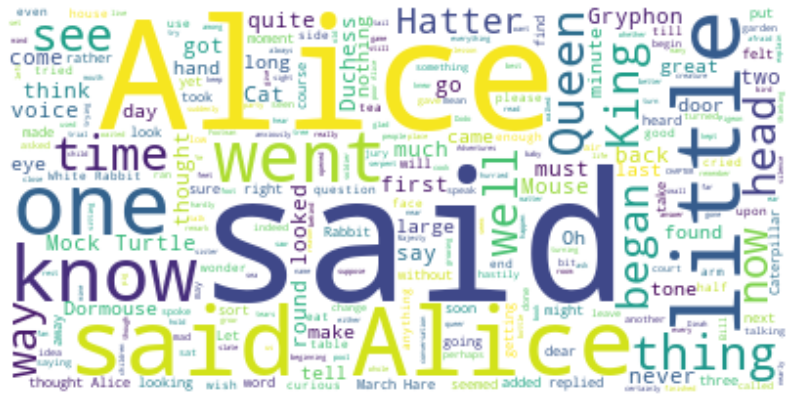

In [8]:
# Metode fig
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

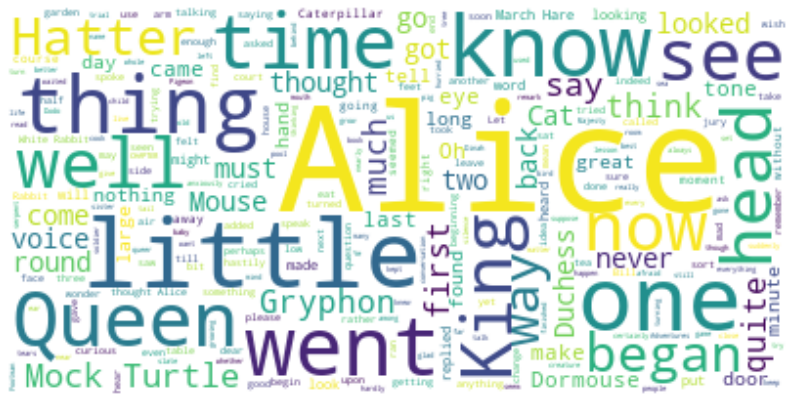

In [9]:
stopwords.add('said')
# Inisiasi wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# Generate wordcloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

In [10]:
# Masking
import numpy as np
from PIL import Image

# Save mask to alice_mask
alice_mask = np.array(Image.open("alice_mask.png"))

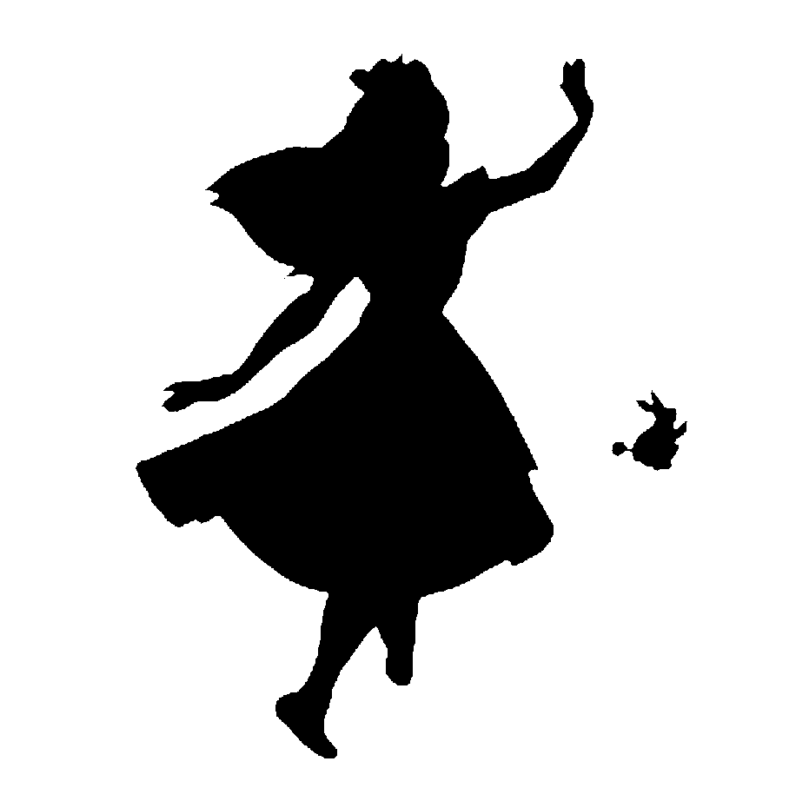

In [11]:
# Look masking
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear');
plt.axis('off');

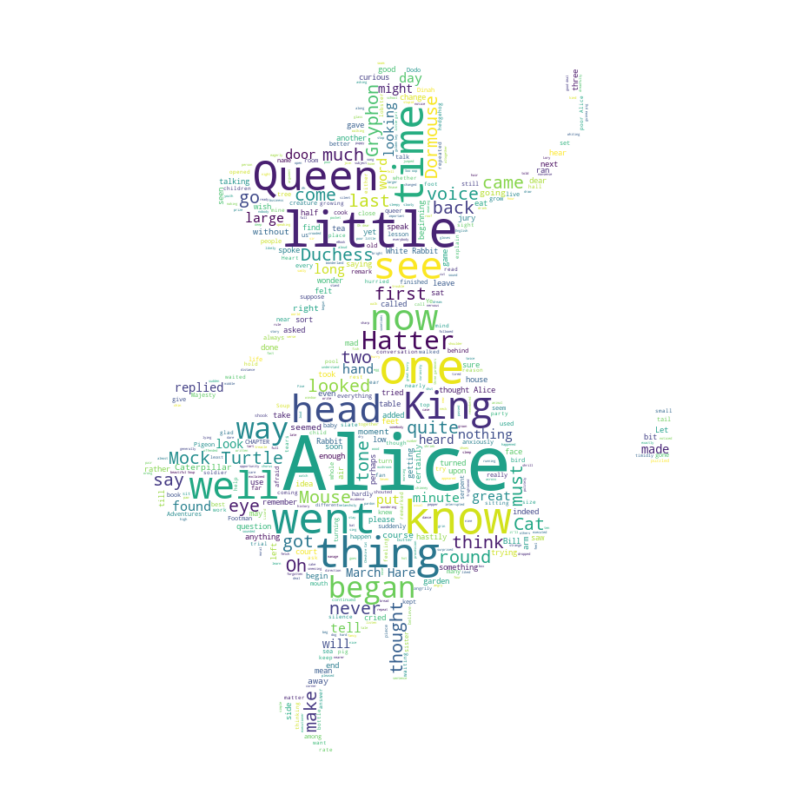

In [12]:
# Inisiasi wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)

# Generate wordcloud
alice_wc.generate(alice_novel)

# Display the wordcloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off');

### Regression Plot

In [13]:
# Import library
import pandas as pd
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
# Bersihkan data
# Hapus kolom yang tidak diperlukan
kol = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(kol, axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# Rename column
df_can.rename(columns={'OdName':'Country',
                       'AreaName':'Continent',
                       'RegName':'Region'}, inplace=True)

In [16]:
# Add total column
df_can['Total'] = df_can.sum(axis=1)

C:\Users\Ika N\AppData\Local\Temp\ipykernel_12812\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [17]:
# Import library
import seaborn as sns

In [18]:
years = np.arange(1980, 2014)
# Use the sum() method to get the total population per year
df_total = pd.DataFrame(df_can[years].sum())

# Change the years to type float (useful for regression later on)
df_total.index = map(float, df_total.index)

# Reset the index to put in back in as a column in the df_tot dataFrame
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['years', 'total']

# View the final dataFrame
df_total.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


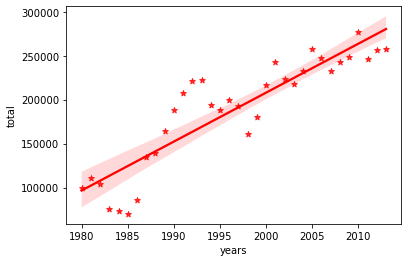

In [19]:
# Create regression plot
sns.regplot(x='years', y='total', data=df_total, color='red', marker='*');

### Pengenalan Folium

In [21]:
# Install folium
! pip install folium

In [22]:
# Import library
import folium

In [23]:
# Definisikan world map
world_map = folium.Map()

# Tampilkan
world_map

In [24]:
# Define the world map centered around Bundaran HI with a middle zoom level
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], zoom_start=20)

# Display world map
world_map

In [25]:
# Create a Stamen Terrain map of the world centered around Bundaran HI
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], 
                       zoom_start=20,
                       tiles='Stamen Terrain')

# Display map
world_map

In [26]:
# Open data
url = "https://github.com/ardhiraka/PFDS_sources/raw/master/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df_incidents = pd.read_csv(url)
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [27]:
# View the first 5 items in the dataset
df_incidents.shape

(150500, 13)

In [28]:
# Data limit is only the top 100
limit = 100
df_incidents = df_incidents.iloc[:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [29]:
# How many entries are in our dataset
df_incidents.shape

(100, 13)

In [30]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.43

In [31]:
# Generate san fransisco map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
sanfran_map

In [32]:
# Inisiasi fitur grup
incidents = folium.map.FeatureGroup()

# Looping ke dataset untuk long dan lat nya
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

# Add incidents to map
sanfran_map.add_child(incidents)

In [33]:
# Inisiasi fitur grup
incidents = folium.map.FeatureGroup()

# Looping ke dataset untuk long dan lat nya
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

# Add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Descript)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# Add incidents to map
sanfran_map.add_child(incidents)

In [34]:
# Create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Loop through the 100 crimes and add each to the map
for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6,
    ).add_to(sanfran_map)

# Show map
sanfran_map

In [35]:
from folium import plugins

# Let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataFrame
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# Loop through the dataFrame and add each data point to the mark cluster
for lat, lng,label in zip(df_incidents.Y, df_incidents.X, df_incidents.Descript):
    folium.CircleMarker(
            [lat, lng],
            popup=label,
            icon=None
    ).add_to(incidents)

# Display map
sanfran_map